In [1]:
import pandas as pd

In [7]:
chexpert_df = pd.read_csv("/Users/jrhs/Desktop/mimic-eye/spreadsheets/CXR-JPG/cxr_chexpert.csv")

In [10]:
negbio_df = pd.read_csv("/Users/jrhs/Desktop/mimic-eye/spreadsheets/CXR-JPG/cxr_negbio.csv")

In [14]:
cxr_meta_df = pd.read_csv("/Users/jrhs/Desktop/mimic-eye/spreadsheets/cxr_meta.csv")

In [16]:
cxr_meta_df.columns

Index(['Unnamed: 0', 'dicom_id', 'subject_id', 'study_id',
       'PerformedProcedureStepDescription', 'ViewPosition', 'Rows', 'Columns',
       'StudyDate', 'StudyTime', 'ProcedureCodeSequence_CodeMeaning',
       'ViewCodeSequence_CodeMeaning',
       'PatientOrientationCodeSequence_CodeMeaning', 'in_eye_gaze',
       'in_reflacx', 'StudyDateTime', 'stay_id'],
      dtype='object')

In [11]:
negbio_df.columns

Index(['Unnamed: 0', 'subject_id', 'study_id', 'Atelectasis', 'Cardiomegaly',
       'Consolidation', 'Edema', 'Enlarged Cardiomediastinum', 'Fracture',
       'Lung Lesion', 'Lung Opacity', 'No Finding', 'Pleural Effusion',
       'Pleural Other', 'Pneumonia', 'Pneumothorax', 'Support Devices'],
      dtype='object')

In [13]:
chexpert_df.columns

Index(['Unnamed: 0', 'subject_id', 'study_id', 'Atelectasis', 'Cardiomegaly',
       'Consolidation', 'Edema', 'Enlarged Cardiomediastinum', 'Fracture',
       'Lung Lesion', 'Lung Opacity', 'No Finding', 'Pleural Effusion',
       'Pleural Other', 'Pneumonia', 'Pneumothorax', 'Support Devices'],
      dtype='object')

In [2]:
import os

In [2]:
df = pd.read_csv("./spreadsheets/reflacx_eye.csv")

In [4]:
import os, json
import pandas as pd

from data.paths import TabularDataPaths
from utils import print as print_f
from utils.preprocessing import get_split_list, checkMissingValue
from utils.init import reproducibility

from data.constants import REFLACX_ALL_LABEL_COLS, REFLACX_REPETITIVE_ALL_LABEL_COLS
from data.paths import MIMIC_EYE_PATH

Index(['Unnamed: 0', 'id', 'split', 'eye_tracking_data_discarded', 'image',
       'dicom_id', 'subject_id', 'image_size_x', 'image_size_y',
       'Airway wall thickening', 'Atelectasis', 'Consolidation', 'Emphysema',
       'Enlarged cardiac silhouette', 'Fibrosis', 'Fracture',
       'Groundglass opacity', 'Mass', 'Nodule', 'Other', 'Pleural effusion',
       'Pleural thickening', 'Pneumothorax', 'Pulmonary edema',
       'Quality issue', 'Support devices', 'Wide mediastinum',
       'Abnormal mediastinal contour', 'Acute fracture', 'Enlarged hilum',
       'Hiatal hernia', 'High lung volume / emphysema',
       'Interstitial lung disease', 'Lung nodule or mass',
       'Pleural abnormality'],
      dtype='object')

In [5]:
mimic_eye_path = MIMIC_EYE_PATH
reflacx_df = pd.read_csv(
    os.path.join(mimic_eye_path, "spreadsheets/REFLACX/metadata.csv")
)
reflacx_df.head(5)

,Unnamed: 0,id,split,eye_tracking_data_discarded,image,dicom_id,subject_id,image_size_x,image_size_y,Airway wall thickening,...,Support devices,Wide mediastinum,Abnormal mediastinal contour,Acute fracture,Enlarged hilum,Hiatal hernia,High lung volume / emphysema,Interstitial lung disease,Lung nodule or mass,Pleural abnormality
0,0,P102R108387,train,False,physionet.org/files/mimic-cxr/2.0.0/files/p18/...,34cedb74-d0996b40-6d218312-a9174bea-d48dc033,18111516,2544,3056,0.0,...,True,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,P102R379837,train,False,physionet.org/files/mimic-cxr/2.0.0/files/p18/...,34cedb74-d0996b40-6d218312-a9174bea-d48dc033,18111516,2544,3056,0.0,...,True,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,P102R558314,train,False,physionet.org/files/mimic-cxr/2.0.0/files/p18/...,34cedb74-d0996b40-6d218312-a9174bea-d48dc033,18111516,2544,3056,4.0,...,True,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,P102R765317,train,False,physionet.org/files/mimic-cxr/2.0.0/files/p18/...,34cedb74-d0996b40-6d218312-a9174bea-d48dc033,18111516,2544,3056,0.0,...,True,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,P102R915878,train,False,physionet.org/files/mimic-cxr/2.0.0/files/p18/...,34cedb74-d0996b40-6d218312-a9174bea-d48dc033,18111516,2544,3056,0.0,...,True,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
from data.paths import MIMIC_EYE_PATH

In [5]:
from data.constants import REFLACX_ALL_LABEL_COLS

In [6]:
df.columns

Index(['Unnamed: 0.1', 'index', 'Unnamed: 0', 'id', 'split',
       'eye_tracking_data_discarded', 'image', 'dicom_id', 'subject_id',
       'image_size_x', 'image_size_y', 'Airway wall thickening', 'Atelectasis',
       'Consolidation', 'Enlarged cardiac silhouette', 'Fibrosis', 'Fracture',
       'Groundglass opacity', 'Other', 'Pneumothorax', 'Pulmonary edema',
       'Quality issue', 'Support devices', 'Wide mediastinum',
       'Abnormal mediastinal contour', 'Acute fracture', 'Enlarged hilum',
       'Hiatal hernia', 'High lung volume / emphysema',
       'Interstitial lung disease', 'Lung nodule or mass',
       'Pleural abnormality', 'image_path', 'bbox_path', 'fixation_path'],
      dtype='object')

In [7]:
bbox_path = df.iloc[0]['bbox_path'].replace("{XAMI_MIMIC_PATH}", MIMIC_EYE_PATH)

In [19]:
utterance_df

,word,timestamp_start_word,timestamp_end_word
0,support,6.90,7.43
1,apparatus,7.43,8.20
2,.,8.20,8.74
3,no,12.73,12.98
4,pneumothorax,12.98,13.99
5,.,13.99,14.47
6,cardiomegaly,16.76,17.54
7,.,17.54,18.08
8,bilateral,19.12,19.68
9,pleural,19.68,20.07


In [26]:
all_starting_time = []
num_bboxes = []
has_lesion = []
all_ending_time = []
for i in range(len(df)):
    fixation_file_path = df.iloc[i]['fixation_path'].replace("{XAMI_MIMIC_PATH}", MIMIC_EYE_PATH)
    utterance_path = os.path.join(os.path.dirname(fixation_file_path), "timestamps_transcription.csv")
    utterance_df = pd.read_csv(utterance_path)
    report_starting_time = utterance_df.iloc[0]['timestamp_start_word']
    all_starting_time.append(report_starting_time)
    report_ending_time = utterance_df.iloc[-1]['timestamp_end_word']
    all_ending_time.append(report_ending_time)
    
    num_bbox = len(pd.read_csv(df.iloc[i]['bbox_path'].replace("{XAMI_MIMIC_PATH}", MIMIC_EYE_PATH)))
    num_bboxes.append(num_bbox)
    has_lesion.append(num_bbox > 0)


    
    

In [31]:
time_df = pd.DataFrame(list(zip(all_starting_time, all_ending_time, num_bboxes, has_lesion,)), columns=["all_starting_time", "all_ending_time", "num_bboxes","has_lesion", ])

In [32]:
time_df.corr()

,all_starting_time,all_ending_time,num_bboxes,has_lesion
all_starting_time,1.000000,0.633979,0.069620,0.009184
all_ending_time,0.633979,1.000000,0.443977,0.347717
num_bboxes,0.069620,0.443977,1.000000,0.734500
has_lesion,0.009184,0.347717,0.734500,1.000000


<AxesSubplot: >

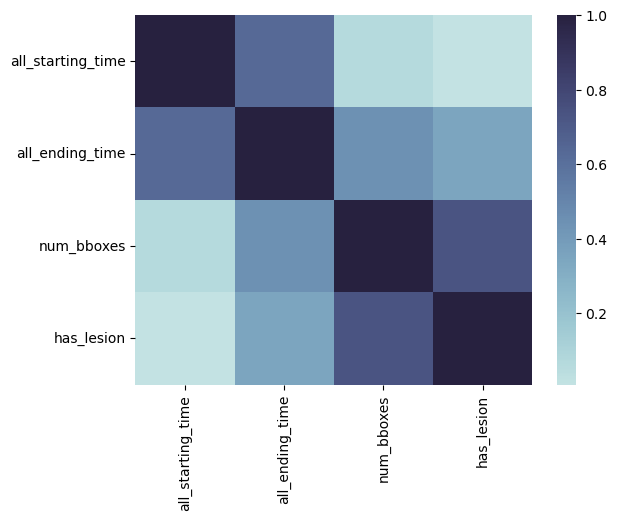

In [33]:
import seaborn as sns
sns.heatmap(time_df.corr(), cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True))

In [13]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x1398d0970>,
 'caps': [<matplotlib.lines.Line2D at 0x1398d0eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1398d0670>],
 'medians': [<matplotlib.lines.Line2D at 0x1398d11b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1398d1450>],
 'means': []}

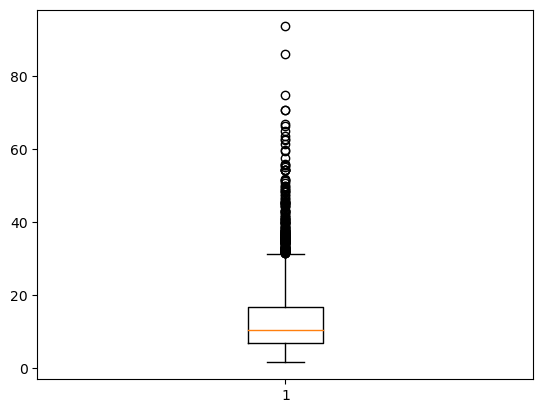

In [14]:
plt.boxplot(all_starting_time)

In [15]:

# does it correlate to disease?


In [16]:
fix_df = pd.read_ㄇacsv(df.iloc[0]['fixation_path'].replace("{XAMI_MIMIC_PATH}", MIMIC_EYE_PATH))

AttributeError: module 'pandas' has no attribute 'read_ㄇacsv'

In [ ]:
fixation_file_path = df.iloc[0]['fixation_path'].replace("{XAMI_MIMIC_PATH}", MIMIC_EYE_PATH)

In [ ]:
utterance_path = os.path.join(os.path.dirname(fixation_file_path), "timestamps_transcription.csv")

In [ ]:
utterance_df = pd.read_csv(utterance_path)
report_starting_time = utterance_df.iloc[0]['timestamp_start_word']

In [ ]:
fix_df[fix_df['timestamp_start_fixation'] > report_starting_time]

,timestamp_start_fixation,timestamp_end_fixation,x_position,y_position,pupil_area_normalized,angular_resolution_x_pixels_per_degree,angular_resolution_y_pixels_per_degree,window_width,window_level,xmin_shown_from_image,ymin_shown_from_image,xmax_shown_from_image,ymax_shown_from_image,xmin_in_screen_coordinates,ymin_in_screen_coordinates,xmax_in_screen_coordinates,ymax_in_screen_coordinates
18,7.080,7.293,405,420,1.131,94,94,0.99829,0.49841,0,303,2521,2463,661,0,3180,2160
19,7.359,7.867,1457,509,1.108,92,92,0.99829,0.49841,0,303,2521,2463,661,0,3180,2160
20,7.883,8.114,1379,503,1.136,92,92,0.99829,0.49841,0,303,2521,2463,661,0,3180,2160
21,8.163,8.573,695,588,1.073,92,92,0.99829,0.49841,0,303,2521,2463,661,0,3180,2160
22,8.618,9.015,430,1123,1.020,93,92,0.99829,0.49841,0,303,2521,2463,661,0,3180,2160
23,9.064,9.938,657,651,0.950,93,92,0.99829,0.49841,0,303,2521,2463,661,0,3180,2160
24,9.974,11.084,1147,740,0.858,91,91,0.99829,0.49841,0,303,2521,2463,661,0,3180,2160
25,11.131,11.365,1004,1389,0.784,91,91,0.99829,0.49841,0,303,2521,2463,661,0,3180,2160
26,11.422,11.858,823,547,0.893,92,92,0.80631,0.46715,0,303,2521,2463,661,0,3180,2160
27,11.877,12.102,756,555,0.931,93,92,0.64286,0.44428,0,303,2521,2463,661,0,3180,2160


In [ ]:
# Questions: how long does radiologists start reporting.

In [ ]:
fix_df

,timestamp_start_fixation,timestamp_end_fixation,x_position,y_position,pupil_area_normalized,angular_resolution_x_pixels_per_degree,angular_resolution_y_pixels_per_degree,window_width,window_level,xmin_shown_from_image,ymin_shown_from_image,xmax_shown_from_image,ymax_shown_from_image,xmin_in_screen_coordinates,ymin_in_screen_coordinates,xmax_in_screen_coordinates,ymax_in_screen_coordinates
0,0.034,0.771,998,1254,2.132,129,128,1.00020,0.50012,0,0,2544,3056,1021,0,2819,2160
1,0.801,1.007,746,1486,1.747,130,129,0.99969,0.49976,0,0,2544,3056,1021,0,2819,2160
2,1.059,1.336,600,603,1.293,131,129,0.99829,0.49841,0,0,2544,3056,1021,0,2819,2160
3,1.362,1.603,870,492,1.112,129,129,0.99829,0.49841,0,0,2544,3056,1021,0,2819,2160
4,1.633,1.822,398,337,1.101,131,130,0.99829,0.49841,0,0,2544,3056,1021,0,2819,2160
5,1.933,2.221,413,317,1.199,132,131,0.99829,0.49841,0,0,2544,3056,1021,0,2819,2160
6,2.270,2.683,928,661,1.332,129,129,0.99829,0.49841,0,0,2544,3056,1021,0,2819,2160
7,2.707,2.865,935,675,1.389,129,129,0.99829,0.49841,0,0,2544,3056,1021,0,2819,2160
8,2.892,3.120,1095,794,1.321,128,128,0.99829,0.49841,0,0,2544,3056,1021,0,2819,2160
9,3.138,3.642,1138,659,1.201,127,127,0.99829,0.49841,0,0,2544,3056,1021,0,2819,2160
